# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1 : Propiedades en Venta</center>
## <center>Parte 4</center>
### <center> Grupo 22 </center>
### <center> Integrantes: </center>
##### <center> Federico Martin Forte,  Francisco Sobral,  Ian Klaus von der Heyde,  Juan Pablo Aschieri,  Joaquin Rivero  </center>

# Carga de Datos y librerías

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from IPython.display import Image
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import xgboost as xgb

In [3]:
viviendas_caba_train=pd.read_csv('./Datasets/viviendas_caba_train.csv').copy()
viviendas_caba_test=pd.read_csv('./Datasets/viviendas_caba_test.csv').copy()
viviendas_caba=pd.read_csv('./Datasets/viviendas_caba.csv').copy()

pca_df=pd.read_csv('./Datasets/pca_properati_argentina_2021.csv').copy()

# 4. Regresión

**Métricas para regresión**

+ Coeficiente de determinación 𝑹^𝟐: coeficiente que explica la variabilidad del problema (0 explica poco, 1 explica mucho).
+ Coeficiente de determinación 𝑹^𝟐 ajustado: similar a 𝑹^𝟐 solo que penaliza x la cantidad de variables incluidas en el modelo.
+ MSE:(Error Cuadrático Medio (Mean Squared Error)): Medida de qué tan cercana es la recta de regresión a los puntos que representan los datos. Mientras más chico más cerca está nuestro modelo de los datos reales. Al ser un valor elevado al cuadrado, es sensible a valores de diferencias grandes.
+ RMSE: es la raíz cuadrada de MSE, es mas fácil de interpretar ya que estará en las mismas unidades (dólares) que las del problema (a menor RMSE mejor es el modelo)

## Modelo 1: KNN

### Dataset completo:

#### Eleccion de variables regresoras

**Realizamos Encoding**

para variable property_type y barrio

In [4]:
viviendas_caba_encoded = viviendas_caba.copy()
viviendas_caba_encoded['property_type'] = LabelEncoder().fit_transform(viviendas_caba['property_type'])
viviendas_caba_encoded['barrio'] = LabelEncoder().fit_transform(viviendas_caba['barrio'])
viviendas_caba_encoded.head(2)

,start_date,end_date,latitud,longitud,barrio,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,geometry
0,2021-09-09,2021-09-26,-34.637319,-58.361124,7,1,3.0,2.0,58.0,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO,POINT (-58.361124 -34.6373187)
1,2021-09-09,2021-09-28,-34.628647,-58.361871,7,1,4.0,3.0,70.0,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur,POINT (-58.3618713 -34.6286465)


In [5]:
#Heatmap correlación
viviendas_caba_encoded.corr().style.background_gradient(cmap='coolwarm')

,latitud,longitud,barrio,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
latitud,1.000000,-0.141103,0.016952,-0.065060,-0.026360,-0.028009,0.021501,0.040684,0.165261
longitud,-0.141103,1.000000,-0.254398,-0.073198,0.009903,0.007454,-0.004242,0.047954,0.126130
barrio,0.016952,-0.254398,1.000000,0.037220,-0.017533,-0.022601,0.016797,0.000657,-0.005310
property_type,-0.065060,-0.073198,0.037220,1.000000,-0.065310,-0.072324,-0.170745,-0.198191,-0.132513
property_rooms,-0.026360,0.009903,-0.017533,-0.065310,1.000000,0.926325,0.757079,0.770356,0.523442
property_bedrooms,-0.028009,0.007454,-0.022601,-0.072324,0.926325,1.000000,0.724889,0.736133,0.483020
property_surface_total,0.021501,-0.004242,0.016797,-0.170745,0.757079,0.724889,1.000000,0.954240,0.723027
property_surface_covered,0.040684,0.047954,0.000657,-0.198191,0.770356,0.736133,0.954240,1.000000,0.776274
property_price,0.165261,0.126130,-0.005310,-0.132513,0.523442,0.483020,0.723027,0.776274,1.000000


**Variables Regresoras**

Gracias al análisis de feature importance realizado en la parte de clasificación sabemos que **latitud** (0.30), **longitud** (0.23), **property_surface_total** (0.16) y **property_surface_covered** (0.15) son las features más importantes para predecir el precio de una propiedad por lo que las seleccionamos como **variables regresoras**. 

Además vemos en la matriz de correlación que barrio y property_type no parecen tener relacion fuerte con el precio por lo que no las seleccionamos

In [49]:
#selecciono variables regresoras y a predecir
X_train_knn = viviendas_caba_train[['latitud','longitud', 'property_surface_total', 'property_surface_covered']]
X_test_knn = viviendas_caba_test[['latitud','longitud', 'property_surface_total', 'property_surface_covered']]

y_train_knn = viviendas_caba_train.property_price
y_test_knn= viviendas_caba_test.property_price

In [ ]:
y_train_knn.to_csv('./Datasets/y_train_knn_property_type.csv', index = False)
y_test_knn.to_csv('./Datasets/y_test_knn_property_type.csv', index = False)
X_train_knn.to_csv('./Datasets/x_train_knn_property_type.csv', index = False)
X_test_knn.to_csv('./Datasets/x_test_knn_property_type.csv', index = False)

#### Ingeniería de características

**Valores Atípicos**

Como en el parte 1 ya limpiamos los valores atípicos no tenemos que hacerlo nuevamente para esta parte

**Normalizado de datos**

Decidimos usar min-max para normalizar ya que fue el que mejores resultados nos dió

In [50]:
scaler = MinMaxScaler() 
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

**Optimizamos los parámetros usando random search cross validation**

In [51]:
"""#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,30), 
              'weights':['distance','uniform'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn_regressor=KNeighborsRegressor()

#Random Search con 5 Folds y 5 iteraciones
rand_knn = RandomizedSearchCV(knn_regressor, params_grid, cv=5, scoring='r2', n_iter=5, random_state=5)

rand_knn.fit(X_train_knn, y_train_knn)
rand_knn.cv_results_['mean_test_score']
joblib.dump(rand_knn, './Models/rand_knn')"""

['./Models/rand_knn']

In [2]:
rand_knn = joblib.load('./Models/rand_knn')

c:\Users\chulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.1.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\chulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.1.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [53]:
#Mejores hiperparametros
print(rand_knn.best_params_)
#Mejor métrica
print(rand_knn.best_score_)

{'weights': 'distance', 'n_neighbors': 27, 'metric': 'euclidean', 'algorithm': 'kd_tree'}
0.8974326393690614


#### Métricas sobre train

In [54]:
#Mejor estimador
best_knn_regressor = rand_knn.best_estimator_

#Predicción con mejor estimador
y_pred_train_knn = best_knn_regressor.predict(X_train_knn)

#Coef. de Determinación R2
r2_score_train = r2_score(y_train_knn, y_pred_train_knn)
print(f'Coef. de Determinación R2: {r2_score(y_train_knn, y_pred_train_knn)}')

#Coef. de Determinación R2 ajustado
n = X_train_knn.shape[0] #n = count of rows in your dataset used for train or test
p = 4 #p = count of independent variables
print(f'Coef. de Determinación R2 ajustado: {1-(1-r2_score_train)*(n-1)/(n-p-1)}')

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_train_knn,
        y_pred  = y_pred_train_knn,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_train_knn,
        y_pred  = y_pred_train_knn,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

Coef. de Determinación R2: 0.9975538061741654
Coef. de Determinación R2 ajustado: 0.997553674477817
El error (mse) de test es: 213681668.32577166
El error (rmse) de test es: 14617.854436468153


In [55]:

performance_train = pd.DataFrame({'Valor Real': y_train_knn,
                            'Prediccion': y_pred_train_knn.round(),
                            'Error': y_train_knn - y_pred_train_knn.round()})

performance_train.head()

,Valor Real,Prediccion,Error
0,167113.0,165587.0,1526.0
1,129000.0,129000.0,0.0
2,124600.0,124600.0,0.0
3,196000.0,196000.0,0.0
4,235000.0,235000.0,0.0


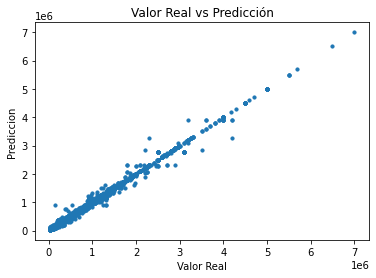

In [56]:
scatter_real_predict_train = performance_train.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 


#### Métricas sobre test 

In [57]:
#Predicción con mejor estimador
y_pred_test_knn = best_knn_regressor.predict(X_test_knn)

#Coef. de Determinación R2
r2_score_test = r2_score(y_test_knn, y_pred_test_knn)
print(f'Coef. de Determinación R2: {r2_score_test}')

#Coef. de Determinación R2 ajustado
n = X_test_knn.shape[0]
p = 4
print(f'Coef. de Determinación R2 ajustado: {1-(1-r2_score_test)*(n-1)/(n-p-1)}')

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_test_knn,
        y_pred  = y_pred_test_knn,
        squared = True
       )
print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_test_knn,
        y_pred  = y_pred_test_knn,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

Coef. de Determinación R2: 0.894105981293596
Coef. de Determinación R2 ajustado: 0.894083172824756
El error (mse) de test es: 9903379174.372705
El error (rmse) de test es: 99515.72325202035


In [58]:
# Performance
performance_test = pd.DataFrame({'Valor Real': y_test_knn,
                            'Prediccion': y_pred_test_knn.round(),
                            'Error': y_test_knn - y_pred_test_knn.round()})
# View
performance_test.head()

,Valor Real,Prediccion,Error
0,140000.0,128856.0,11144.0
1,69900.0,80500.0,-10600.0
2,75900.0,63286.0,12614.0
3,315000.0,225454.0,89546.0
4,79000.0,78500.0,500.0


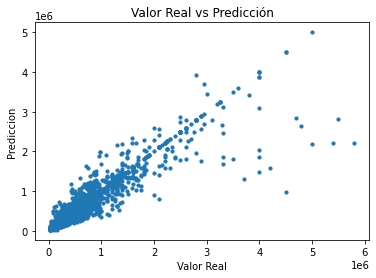

In [59]:
scatter_real_predict_test = performance_test.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 


### Dataset con reducción de dimensionalidad:

#### Eleccion de variables regresoras

**Variables Regresoras**

Gracias al análisis de feature importance realizado en la parte de clasificación sabemos que para obtener el mejor r2 tenemos que elegir a las 4 componentes principales como variables regresoras

In [60]:
#selecciono variables regresoras y a predecir
X_knn_pca = pca_df[['cp_1','cp_2','cp_3', 'cp_4']]
y_knn_pca = pca_df.property_price

#Separacion Train/test  (80/20)
X_train_knn_pca, X_test_knn_pca, y_train_knn_pca, y_test_knn_pca = train_test_split(X_knn_pca, y_knn_pca, test_size= 0.2, random_state=12)

#### Ingeniería de características

**Valores Atípicos**

Como en el parte 1 ya limpiamos los valores atípicos no tenemos que hacerlo nuevamente para esta parte

**Normalizado de datos**

Decidimos usar min-max para normalizar ya que fue el que mejores resultados nos dió

In [61]:
scaler = MinMaxScaler() 
X_train_knn_pca = scaler.fit_transform(X_train_knn_pca)
X_test_knn_pca = scaler.transform(X_test_knn_pca)

**Optimizamos los parámetros usando Random Search Cross Validation**

In [62]:
"""#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,30), 
              'weights':['distance','uniform'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn_regressor_pca=KNeighborsRegressor()

#Random Search con 5 Folds y 5 iteraciones
rand_knn_pca = RandomizedSearchCV(knn_regressor_pca, params_grid, cv=5, scoring='r2', n_iter=5, random_state=5)

rand_knn_pca.fit(X_train_knn_pca, y_train_knn_pca)
rand_knn_pca.cv_results_['mean_test_score']
joblib.dump(rand_knn_pca, './Models/rand_knn_pca')"""

['./Models/rand_knn_pca']

In [63]:
rand_knn_pca = joblib.load('./Models/rand_knn_pca')

In [64]:
#Mejores hiperparametros
print(rand_knn_pca.best_params_)
#Mejor métrica
print(rand_knn_pca.best_score_)

{'weights': 'distance', 'n_neighbors': 27, 'metric': 'euclidean', 'algorithm': 'kd_tree'}
0.7633752072686366


#### Métricas sobre train

In [65]:
#Mejor estimador
best_knn_regressor_pca = rand_knn_pca.best_estimator_

#Predicción con mejor estimador
y_pred_train_knn_pca = best_knn_regressor_pca.predict(X_train_knn_pca)

#Coef. de Determinación R2
r2_score_train_knn_pca = r2_score(y_train_knn_pca, y_pred_train_knn_pca)
print(f'Coef. de Determinación R2: {r2_score_train_knn_pca}')

#Coef. de Determinación R2 ajustado
n = X_train_knn_pca.shape[0] #n = count of rows in your dataset used for train or test
p = 4 #p = count of independent variables
print(f'Coef. de Determinación R2 ajustado: {1-(1-r2_score_train_knn_pca)*(n-1)/(n-p-1)}')

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_train_knn_pca,
        y_pred  = y_pred_train_knn_pca,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_train_knn_pca,
        y_pred  = y_pred_train_knn_pca,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

Coef. de Determinación R2: 0.9688657344036952
Coef. de Determinación R2 ajustado: 0.9688640581753332
El error (mse) de test es: 2737640806.2529674
El error (rmse) de test es: 52322.469420440844


In [66]:
# Performance
performance_train_knn_pca = pd.DataFrame({'Valor Real': y_train_knn_pca,
                            'Prediccion': y_pred_train_knn_pca.round(),
                            'Error': y_train_knn_pca - y_pred_train_knn_pca.round()})
# View
performance_train_knn_pca.head()

,Valor Real,Prediccion,Error
59523,89000.0,89000.0,0.0
76456,140000.0,140000.0,0.0
26920,290000.0,239500.0,50500.0
27840,89000.0,89000.0,0.0
20164,650000.0,707500.0,-57500.0


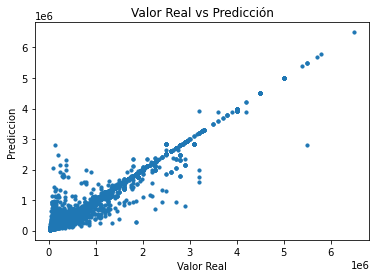

In [67]:
scatter_real_predict_train = performance_train_knn_pca.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 


#### Métricas sobre test 

In [68]:
#Predicción con mejor estimador
y_pred_test_knn_pca = best_knn_regressor_pca.predict(X_test_knn_pca)

#Coef. de Determinación R2
r2_score_test_knn_pca = r2_score(y_test_knn_pca, y_pred_test_knn_pca)
print(f'Coef. de Determinación R2: {r2_score_test_knn_pca}')

#Coef. de Determinación R2 ajustado
n = X_test_knn_pca.shape[0]
p = 4
print(f'Coef. de Determinación R2 ajustado: {1-(1-r2_score_test_knn_pca)*(n-1)/(n-p-1)}')

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_test_knn_pca,
        y_pred  = y_pred_test_knn_pca,
        squared = True
       )
print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_test_knn_pca,
        y_pred  = y_pred_test_knn_pca,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

Coef. de Determinación R2: 0.7883237188516572
Coef. de Determinación R2 ajustado: 0.7882781259851129
El error (mse) de test es: 19309058295.20586
El error (rmse) de test es: 138957.03758790292


In [69]:

performance_test_knn_pca = pd.DataFrame({'Valor Real': y_test_knn_pca,
                            'Prediccion': y_pred_test_knn_pca.round(),
                            'Error': y_test_knn_pca - y_pred_test_knn_pca.round()})

performance_test_knn_pca.head()

,Valor Real,Prediccion,Error
53374,85000.0,139318.0,-54318.0
897,289000.0,189682.0,99318.0
41973,235000.0,200330.0,34670.0
20322,92000.0,147184.0,-55184.0
84681,129000.0,193995.0,-64995.0


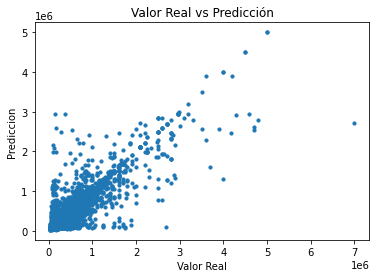

In [70]:
scatter_real_predict_test = performance_test_knn_pca.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 


### Conclusiones KNN


Utilizamos 5 folds porque no obtuvimos mejoras al utilizar mayor cantidad.

Observamos que los resultados sobre el dataset original fueron mejores (en cuanto a métricas) comparados con los del dataset con reducción pca.

## Modelo 2: XGBoost

### Dataset completo:

**Variables Regresoras**

Por el análisis de feature importance realizado en la parte de clasificación sabemos que **latitud** (0.30), **longitud** (0.23), **property_surface_total** (0.16), **property_surface_covered** (0.15) y **property_rooms** (0.02) son las features más importantes para predecir el precio de una propiedad por lo que las seleccionamos como **variables regresoras**. 

In [71]:
#selecciono variables regresoras y a predecir
x_train_xgb = viviendas_caba_train[['latitud','longitud', 'property_surface_total', 'property_surface_covered', 'property_rooms']]
x_test_xgb = viviendas_caba_test[['latitud','longitud', 'property_surface_total', 'property_surface_covered', 'property_rooms']]

y_train_xgb = viviendas_caba_train.property_price
y_test_xgb = viviendas_caba_test.property_price



In [72]:
scaler = MinMaxScaler() 
x_train_xgb = scaler.fit_transform(x_train_xgb)
x_test_xgb = scaler.transform(x_test_xgb)

In [73]:
"""#Grilla de Parámetros
params_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

#Clasificador KNN
xgb_regressor = xgb.XGBRegressor()

#Random Search con 5 Folds y 5 iteraciones
rand_xgb = RandomizedSearchCV(xgb_regressor, params_grid, cv=5, scoring='r2', n_iter=5, random_state=5)

rand_xgb.fit(x_train_xgb, y_train_xgb)
rand_xgb.cv_results_['mean_test_score']
joblib.dump(rand_xgb, './Models/rand_xgb')"""

['./Models/rand_xgb']

In [74]:
rand_xgb = joblib.load('./Models/rand_xgb')

In [75]:
best_xgb_regressor = rand_xgb.best_estimator_
best_xgb_regressor

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

#### Métricas sobre train

In [76]:
#Predicción con mejor estimador
y_pred_train_xgb = best_xgb_regressor.predict(x_train_xgb)

#Coef. de Determinación R2
r2_score_train_xgb = r2_score(y_train_xgb, y_pred_train_xgb)
print(f'Coef. de Determinación R2: {r2_score_train_xgb}')

#Coef. de Determinación R2 ajustado
n = x_train_xgb.shape[0] #n = count of rows in your dataset used for train or test
p = 4 #p = count of independent variables
print(f'Coef. de Determinación R2 ajustado: {1-(1-r2_score_train_xgb)*(n-1)/(n-p-1)}')

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_train_xgb,
        y_pred  = y_pred_train_xgb,
        squared = True
       )

print(f"El error (mse) de train es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_train_xgb,
        y_pred  = y_pred_train_xgb,
        squared = False
       )

print(f"El error (rmse) de train es: {rmse}")

Coef. de Determinación R2: 0.9853714785296712
Coef. de Determinación R2 ajustado: 0.9853706909703038
El error (mse) de train es: 1277841044.2814214
El error (rmse) de train es: 35746.902583040974


In [77]:
# Performance
performance_train_xgb = pd.DataFrame({'Valor Real': y_train_xgb,
                            'Prediccion': y_pred_train_xgb.round(),
                            'Error': y_train_xgb - y_pred_train_xgb.round()})
# View
performance_train_xgb.head()

,Valor Real,Prediccion,Error
0,167113.0,134552.0,32561.0
1,129000.0,128032.0,968.0
2,124600.0,130931.0,-6331.0
3,196000.0,165463.0,30537.0
4,235000.0,175644.0,59356.0


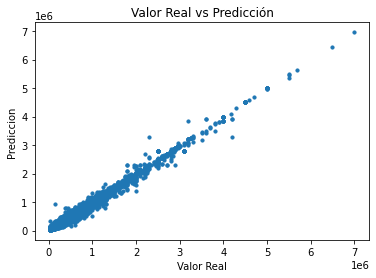

In [78]:
scatter_real_predict_train_xgb = performance_train_xgb.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 


#### Métricas sobre test

In [79]:
#Predicción con mejor estimador
y_pred_test_xgb = best_xgb_regressor.predict(x_test_xgb)

#Coef. de Determinación R2
r2_score_test_xgb = r2_score(y_test_xgb, y_pred_test_xgb)
print(f'Coef. de Determinación R2: {r2_score_test_xgb}')

#Coef. de Determinación R2 ajustado
n = x_test_xgb.shape[0] #n = count of rows in your dataset used for train or test
p = 4 #p = count of independent variables
print(f'Coef. de Determinación R2 ajustado: {1-(1-r2_score_test_xgb)*(n-1)/(n-p-1)}')

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_test_xgb,
        y_pred  = y_pred_test_xgb,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_test_xgb,
        y_pred  = y_pred_test_xgb,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

Coef. de Determinación R2: 0.9019645365048344
Coef. de Determinación R2 ajustado: 0.9019434206869473
El error (mse) de test es: 9168434434.619144
El error (rmse) de test es: 95751.94219763453


In [80]:
# Performance
performance_test_xgb = pd.DataFrame({'Valor Real': y_test_xgb,
                            'Prediccion': y_pred_test_xgb.round(),
                            'Error': y_test_xgb - y_pred_test_xgb.round()})
# View
performance_test_xgb.head()

,Valor Real,Prediccion,Error
0,140000.0,109444.0,30556.0
1,69900.0,84489.0,-14589.0
2,75900.0,69397.0,6503.0
3,315000.0,193416.0,121584.0
4,79000.0,74877.0,4123.0


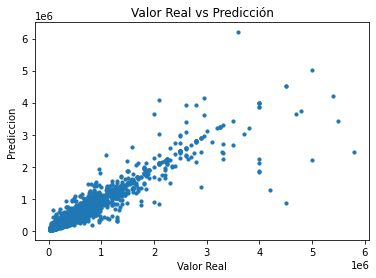

In [81]:
scatter_real_predict_test__xgb = performance_test_xgb.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 


### Dataset con reducción de dimensionalidad:

**Variables Regresoras**

Gracias al análisis de feature importance realizado en la parte de clasificación sabemos que para obtener el mejor r2 tenemos que elegir a las 4 componentes principales como variables regresoras

In [82]:
#selecciono variables regresoras y a predecir
X_xgb_pca = pca_df[['cp_1','cp_2','cp_3', 'cp_4']]
y_xgb_pca = pca_df.property_price

#Separacion Train/test  (80/20)
x_train_xgb_pca, x_test_xgb_pca, y_train_xgb_pca, y_test_xgb_pca = train_test_split(X_xgb_pca, y_xgb_pca, test_size= 0.2, random_state=12)

In [83]:
scaler = MinMaxScaler() 
x_train_xgb_pca = scaler.fit_transform(x_train_xgb_pca)
x_test_xgb_pca = scaler.transform(x_test_xgb_pca)

In [62]:
"""#Grilla de Parámetros
params_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

#Clasificador KNN
xgb_regressor_pca = xgb.XGBRegressor()

#Random Search con 5 Folds y 5 iteraciones
rand_xgb_pca = RandomizedSearchCV(xgb_regressor_pca, params_grid, cv=5, scoring='r2', n_iter=5, random_state=5)

rand_xgb_pca.fit(x_train_xgb_pca, y_train_xgb_pca)
rand_xgb_pca.cv_results_['mean_test_score']
joblib.dump(rand_xgb_pca, './Models/rand_xgb_pca') """

"#Grilla de Parámetros\nparams_grid = {\n    'n_estimators': [100, 400, 800],\n    'max_depth': [3, 6, 9],\n    'learning_rate': [0.05, 0.1, 0.20],\n    'min_child_weight': [1, 10, 100]\n    }\n\n#Clasificador KNN\nxgb_regressor_pca = xgb.XGBRegressor()\n\n#Random Search con 5 Folds y 5 iteraciones\nrand_xgb_pca = RandomizedSearchCV(xgb_regressor_pca, params_grid, cv=5, scoring='r2', n_iter=5, random_state=5)\n\nrand_xgb_pca.fit(x_train_xgb_pca, y_train_xgb_pca)\nrand_xgb_pca.cv_results_['mean_test_score']\njoblib.dump(rand_xgb_pca, './Models/rand_xgb_pca') "

In [84]:
rand_xgb_pca = joblib.load('./Models/rand_xgb_pca')

In [85]:
best_xgb_regressor_pca = rand_xgb_pca.best_estimator_
best_xgb_regressor_pca

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

#### Métricas sobre train

In [86]:
#Predicción con mejor estimador
y_pred_train_xgb_pca = best_xgb_regressor_pca.predict(x_train_xgb_pca)

#Coef. de Determinación R2
r2_score_train_xgb_pca = r2_score(y_train_xgb_pca, y_pred_train_xgb_pca)
print(f'Coef. de Determinación R2: {r2_score_train_xgb_pca}')

#Coef. de Determinación R2 ajustado
n = x_train_xgb_pca.shape[0] #n = count of rows in your dataset used for train or test
p = 4 #p = count of independent variables
print(f'Coef. de Determinación R2 ajustado: {1-(1-r2_score_train_xgb_pca)*(n-1)/(n-p-1)}')

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_train_xgb_pca,
        y_pred  = y_pred_train_xgb_pca,
        squared = True
       )

print(f"El error (mse) de train es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_train_xgb_pca,
        y_pred  = y_pred_train_xgb_pca,
        squared = False
       )

print(f"El error (rmse) de train es: {rmse}")

Coef. de Determinación R2: 0.8636292656816953
Coef. de Determinación R2 ajustado: 0.8636219236587428
El error (mse) de train es: 11991099834.800097
El error (rmse) de train es: 109503.88045544366


In [87]:
# Performance
performance_train_xgb_pca = pd.DataFrame({'Valor Real': y_train_xgb_pca,
                            'Prediccion': y_pred_train_xgb_pca.round(),
                            'Error': y_train_xgb_pca - y_pred_train_xgb_pca.round()})
# View
performance_train_xgb_pca.head()

,Valor Real,Prediccion,Error
59523,89000.0,143508.0,-54508.0
76456,140000.0,130431.0,9569.0
26920,290000.0,198923.0,91077.0
27840,89000.0,98242.0,-9242.0
20164,650000.0,819091.0,-169091.0


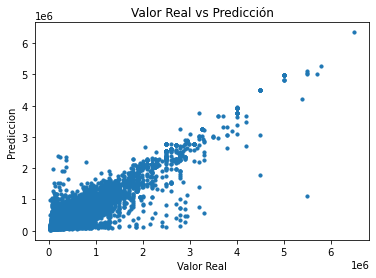

In [88]:
scatter_real_predict_train_xgb_pca = performance_train_xgb_pca.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 


#### Métricas sobre test

In [89]:
#Predicción con mejor estimador
y_pred_test_xgb_pca = best_xgb_regressor_pca.predict(x_test_xgb_pca)

#Coef. de Determinación R2
r2_score_test_xgb_pca = r2_score(y_test_xgb_pca, y_pred_test_xgb_pca)
print(f'Coef. de Determinación R2: {r2_score_test_xgb_pca}')

#Coef. de Determinación R2 ajustado
n = x_test_xgb_pca.shape[0] #n = count of rows in your dataset used for train or test
p = 4 #p = count of independent variables
print(f'Coef. de Determinación R2 ajustado: {1-(1-r2_score_test_xgb_pca)*(n-1)/(n-p-1)}')

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_test_xgb_pca,
        y_pred  = y_pred_test_xgb_pca,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_test_xgb_pca,
        y_pred  = y_pred_test_xgb_pca,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

Coef. de Determinación R2: 0.785095662990897
Coef. de Determinación R2 ajustado: 0.7850493748347376
El error (mse) de test es: 19603520756.741264
El error (rmse) de test es: 140012.57356659533


In [90]:
# Performance
performance_test_xgb_pca = pd.DataFrame({'Valor Real': y_test_xgb_pca,
                            'Prediccion': y_pred_test_xgb_pca.round(),
                            'Error': y_test_xgb_pca - y_pred_test_xgb_pca.round()})
# View
performance_test_xgb_pca.head()

,Valor Real,Prediccion,Error
53374,85000.0,101839.0,-16839.0
897,289000.0,179931.0,109069.0
41973,235000.0,196831.0,38169.0
20322,92000.0,120060.0,-28060.0
84681,129000.0,186490.0,-57490.0


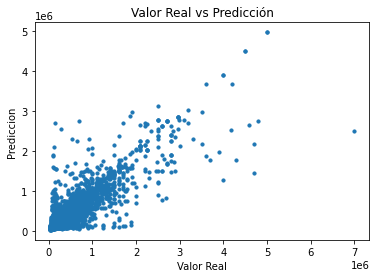

In [91]:
scatter_real_predict_test__xgb_pca = performance_test_xgb_pca.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 


### Conclusiones XGBoost


Utilizamos 5 folds porque no obtuvimos mejoras al utilizar una mayor cantidad.

Observamos que los resultados obtenidos son similares a los de KNN, aunque todas las métricas son levemente mejores.

La volvemos a observar que predice mejor el dataset sin reduccion de dimensionalidad

## Modelo 3: GradientBoostingRegressor

### Dataset completo:

**Variables Regresoras**

Por el análisis de feature importance realizado en la parte de clasificación sabemos que **latitud** (0.30), **longitud** (0.23), **property_surface_total** (0.16) y **property_surface_covered** (0.15) son las features más importantes para predecir el precio de una propiedad por lo que las seleccionamos como **variables regresoras**. 

In [92]:
#selecciono variables regresoras y a predecir
x_train_GBR = viviendas_caba_train[['latitud', 'longitud','property_surface_total', 'property_surface_covered']]
x_test_GBR = viviendas_caba_test[['latitud', 'longitud','property_surface_total', 'property_surface_covered']]


y_train_GBR = viviendas_caba_train.property_price
y_test_GBR = viviendas_caba_test.property_price

In [93]:
scaler = MinMaxScaler() 
x_train_GBR = scaler.fit_transform(x_train_GBR)
x_test_GBR = scaler.transform(x_test_GBR)

In [73]:
"""num_estimators = [500,1000]
learn_rates = [0.02, 0.05]
max_depths = [4, 10]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

rand_GBR = RandomizedSearchCV(GradientBoostingRegressor(loss='huber'), param_grid, random_state=1, n_iter=5, cv=5, verbose=0, n_jobs=-1)

rand_GBR.fit(x_train_GBR, y_train_GBR)
joblib.dump(rand_GBR, './Models/rand_GBR') """

"num_estimators = [500,1000]\nlearn_rates = [0.02, 0.05]\nmax_depths = [4, 10]\nmin_samples_leaf = [5,10]\nmin_samples_split = [5,10]\n\nparam_grid = {'n_estimators': num_estimators,\n              'learning_rate': learn_rates,\n              'max_depth': max_depths,\n              'min_samples_leaf': min_samples_leaf,\n              'min_samples_split': min_samples_split}\n\nrand_GBR = RandomizedSearchCV(GradientBoostingRegressor(loss='huber'), param_grid, random_state=1, n_iter=5, cv=5, verbose=0, n_jobs=-1)\n\nrand_GBR.fit(x_train_GBR, y_train_GBR)\njoblib.dump(rand_GBR, './Models/rand_GBR') "

In [94]:
rand_GBR = joblib.load('./Models/rand_GBR')

random_search.best_estimator_: 

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=10,
                          min_samples_leaf=5, min_samples_split=10,
                          n_estimators=1000)

#### Métricas sobre train

In [95]:
#Mejor estimador
best_GBR_regressor = rand_GBR.best_estimator_

#Predicción con mejor estimador
y_pred_train_GBR = best_GBR_regressor.predict(x_train_GBR)

#Coef. de Determinación R2
r2_score_train_GBR = r2_score(y_train_GBR, y_pred_train_GBR)
print(f'Coef. de Determinación R2: {r2_score_train_GBR}')

#Coef. de Determinación R2 ajustado
n = x_train_GBR.shape[0] #n = count of rows in your dataset used for train or test
p = 4 #p = count of independent variables
print(f'Coef. de Determinación R2 ajustado: {1-(1-r2_score_train_GBR)*(n-1)/(n-p-1)}')

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_train_GBR,
        y_pred  = y_pred_train_GBR,
        squared = True
       )

print(f"El error (mse) de train es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_train_GBR,
        y_pred  = y_pred_train_GBR,
        squared = False
       )

print(f"El error (rmse) de train es: {rmse}")

Coef. de Determinación R2: 0.9619950413090679
Coef. de Determinación R2 ajustado: 0.9619929952266059
El error (mse) de train es: 3319836266.4331245
El error (rmse) de train es: 57618.02032726502


In [96]:
# Performance
performance_train_GBR = pd.DataFrame({'Valor Real': y_train_GBR,
                            'Prediccion': y_pred_train_GBR.round(),
                            'Error': y_train_GBR - y_pred_train_GBR.round()})
# View
performance_train_GBR.head()

,Valor Real,Prediccion,Error
0,167113.0,145846.0,21267.0
1,129000.0,126414.0,2586.0
2,124600.0,137443.0,-12843.0
3,196000.0,165285.0,30715.0
4,235000.0,179462.0,55538.0


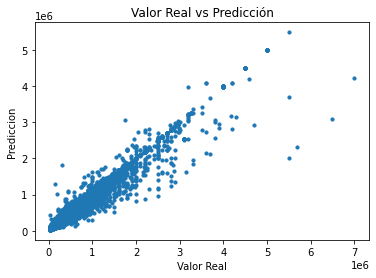

In [97]:
scatter_real_predict_train_GBR = performance_train_GBR.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 


#### Métricas sobre test

In [98]:
#Predicción con mejor estimador
y_pred_test_GBR = best_GBR_regressor.predict(x_test_GBR)

#Coef. de Determinación R2
r2_score_test = r2_score(y_test_GBR, y_pred_test_GBR)
print(f'Coef. de Determinación R2: {r2_score_test}')

#Coef. de Determinación R2 ajustado
n = x_test_GBR.shape[0] #n = count of rows in your dataset used for train or test
p = 4 #p = count of independent variables
print(f'Coef. de Determinación R2 ajustado: {1-(1-r2_score_test)*(n-1)/(n-p-1)}')

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_test_GBR,
        y_pred  = y_pred_test_GBR,
        squared = True
       )
print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_test_GBR,
        y_pred  = y_pred_test_GBR,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

Coef. de Determinación R2: 0.9079629381516854
Coef. de Determinación R2 ajustado: 0.9079431143270452
El error (mse) de test es: 8607454252.030666
El error (rmse) de test es: 92776.36688311666


In [99]:
# Performance
performance_test_GBR = pd.DataFrame({'Valor Real': y_test_GBR,
                            'Prediccion': y_pred_test_GBR.round(),
                            'Error': y_test_GBR - y_pred_test_GBR.round()})
# View
performance_test_GBR.head()

,Valor Real,Prediccion,Error
0,140000.0,116287.0,23713.0
1,69900.0,80959.0,-11059.0
2,75900.0,64931.0,10969.0
3,315000.0,189326.0,125674.0
4,79000.0,74635.0,4365.0


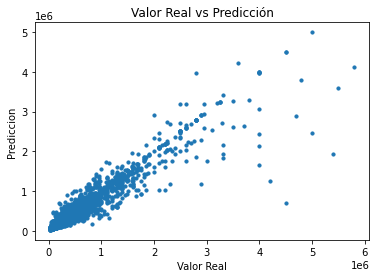

In [100]:
scatter_real_predict_test_GBR = performance_test_GBR.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 


### Dataset con reducción de dimensionalidad:

#### Eleccion de variables regresoras

**Variables Regresoras**

Gracias al análisis de feature importance realizado en la parte de clasificación sabemos que para obtener el mejor r2 tenemos que elegir a las 4 componentes principales como variables regresoras

In [101]:
#selecciono variables regresoras y a predecir
x_GBR_pca = pca_df[['cp_1','cp_2','cp_3', 'cp_4']]
y_GBR_pca = pca_df.property_price

#Separacion Train/test  (80/20)
x_train_GBR_pca, x_test_GBR_pca, y_train_GBR_pca, y_test_GBR_pca = train_test_split(x_GBR_pca, y_GBR_pca, test_size= 0.2, random_state=12)

#### Ingeniería de características

**Valores Atípicos**

Como en el parte 1 ya limpiamos los valores atípicos no tenemos que hacerlo nuevamente para esta parte

**Normalizado de datos**

Decidimos usar min-max para normalizar ya que fue el que mejores resultados nos dió

In [102]:
scaler = MinMaxScaler() 
x_train_GBR_pca = scaler.fit_transform(x_train_GBR_pca)
x_test_GBR_pca = scaler.transform(x_test_GBR_pca)

In [83]:
"""num_estimators = [500,1000]
learn_rates = [0.02, 0.05]
max_depths = [4, 10]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

rand_GBR_pca =RandomizedSearchCV(GradientBoostingRegressor(loss='huber'), param_grid, random_state=1, n_iter=5, cv=5, verbose=0, n_jobs=-1)

rand_GBR_pca.fit(x_train_GBR_pca, y_train_GBR_pca)
joblib.dump(rand_GBR_pca, './Models/rand_GBR_pca') """

"num_estimators = [500,1000]\nlearn_rates = [0.02, 0.05]\nmax_depths = [4, 10]\nmin_samples_leaf = [5,10]\nmin_samples_split = [5,10]\n\nparam_grid = {'n_estimators': num_estimators,\n              'learning_rate': learn_rates,\n              'max_depth': max_depths,\n              'min_samples_leaf': min_samples_leaf,\n              'min_samples_split': min_samples_split}\n\nrand_GBR_pca =RandomizedSearchCV(GradientBoostingRegressor(loss='huber'), param_grid, random_state=1, n_iter=5, cv=5, verbose=0, n_jobs=-1)\n\nrand_GBR_pca.fit(x_train_GBR_pca, y_train_GBR_pca)\njoblib.dump(rand_GBR_pca, './Models/rand_GBR_pca') "

In [103]:
rand_GBR_pca = joblib.load('./Models/rand_GBR_pca')

#### Métricas sobre train

In [104]:
#Mejor estimador
best_GBR_regressor_pca = rand_GBR_pca.best_estimator_

#Predicción con mejor estimador
y_pred_train_GBR_pca = best_GBR_regressor_pca.predict(x_train_GBR_pca)

#Coef. de Determinación R2
r2_score_train_GBR_pca = r2_score(y_train_GBR_pca, y_pred_train_GBR_pca)
print(f'Coef. de Determinación R2: {r2_score_train_GBR_pca}')

#Coef. de Determinación R2 ajustado
n_pca = x_train_GBR_pca.shape[0] #n = count of rows in your dataset used for train or test
p_pca = 4 #p = count of independent variables
print(f'Coef. de Determinación R2 ajustado: {1-(1-r2_score_train_GBR_pca)*(n_pca-1)/(n_pca-p_pca-1)}')

#Mean Square Error
mse_pca = metrics.mean_squared_error(
        y_true = y_train_GBR_pca,
        y_pred = y_pred_train_GBR_pca,
        squared = True
       )

print(f"El error (mse) de train es: {mse_pca}")

#Root Mean Square Error
rmse_pca = metrics.mean_squared_error(
        y_true = y_train_GBR_pca,
        y_pred = y_pred_train_GBR_pca,
        squared = False
       )

print(f"El error (rmse) de train es: {rmse_pca}")

Coef. de Determinación R2: 0.8686983491857582
Coef. de Determinación R2 ajustado: 0.8686912800756681
El error (mse) de train es: 11545374535.512056
El error (rmse) de train es: 107449.40453772676


In [105]:
# Performance
performance_train_GBR_pca = pd.DataFrame({'Valor Real': y_train_GBR_pca,
                            'Prediccion': y_pred_train_GBR_pca.round(),
                            'Error': y_train_GBR_pca - y_pred_train_GBR_pca.round()})
# View
performance_train_GBR_pca.head()

,Valor Real,Prediccion,Error
59523,89000.0,153672.0,-64672.0
76456,140000.0,126257.0,13743.0
26920,290000.0,226615.0,63385.0
27840,89000.0,96443.0,-7443.0
20164,650000.0,697902.0,-47902.0


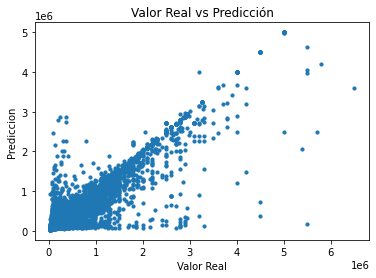

In [106]:
scatter_real_predict_train_GBR_pca = performance_train_GBR_pca.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 


#### Métricas sobre test

In [107]:
#Predicción con mejor estimador
y_pred_test_GBR_pca = best_GBR_regressor_pca.predict(x_test_GBR_pca)

#Coef. de Determinación R2
r2_score_test_pca = r2_score(y_test_GBR_pca, y_pred_test_GBR_pca)
print(f'Coef. de Determinación R2: {r2_score_test_pca}')

#Coef. de Determinación R2 ajustado
n_pca = x_test_GBR_pca.shape[0] #n = count of rows in your dataset used for train or test
p_pca = 4 #p = count of independent variables
print(f'Coef. de Determinación R2 ajustado: {1-(1-r2_score_test)*(n_pca-1)/(n_pca-p_pca-1)}')

#Mean Square Error
mse_pca = metrics.mean_squared_error(
        y_true  = y_test_GBR_pca,
        y_pred  = y_pred_test_GBR_pca,
        squared = True
       )
print(f"El error (mse) de test es: {mse_pca}")

#Root Mean Square Error
rmse_pca = metrics.mean_squared_error(
        y_true  = y_test_GBR_pca,
        y_pred  = y_pred_test_GBR_pca,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_pca}")

Coef. de Determinación R2: 0.7947909362055428
Coef. de Determinación R2 ajustado: 0.9079431143270452
El error (mse) de test es: 18719120319.08264
El error (rmse) de test es: 136817.83626078378


In [108]:
# Performance
performance_test_GBR_pca = pd.DataFrame({'Valor Real': y_test_GBR_pca,
                            'Prediccion': y_pred_test_GBR_pca.round(),
                            'Error': y_test_GBR_pca - y_pred_test_GBR_pca.round()})
# View
performance_test_GBR_pca.head()

,Valor Real,Prediccion,Error
53374,85000.0,110066.0,-25066.0
897,289000.0,191975.0,97025.0
41973,235000.0,198373.0,36627.0
20322,92000.0,105684.0,-13684.0
84681,129000.0,229546.0,-100546.0


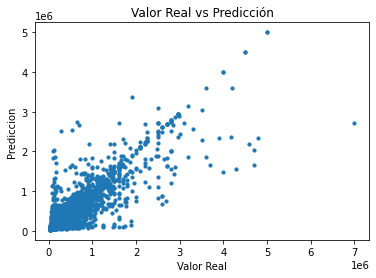

In [109]:
scatter_real_predict_test_GBR_pca = performance_test_GBR_pca.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 


### Conclusiones GradientBoostingRegressor


Utilizamos 5 folds porque no obtuvimos mejoras al utilizar una mayor cantidad.

Observamos que los resultados obtenidos son similares a los de XGBoost y KNN, aunque todas las métricas son levemente mejores. Como contra encontramos que la complejidad algorítmica es ampliamente superiror a la de los otros modelos

Volvemos a observar que predice mejor el dataset sin reduccion de dimensionalidad

## Conclusiones generales de Regresión

Observamos que los resultados obtenidos son similares en los 3 casos, aunque todas las métricas son levemente mejores con GBR aunque la complejidad algorítmica es ampliamente superiror a la de los otros modelos, con lo cual concluímos que:
+ En caso de buscar las mejores métricas usamos GBR
+ En caso de buscar la menor complejidad algorítmica usamos KNN
+ En caso de buscar un intermedio entre complejidad algorítmica y mejores métricas usamos XGB

En cuanto a las pruebas con el dataset reducido llegamos a la conclusión la perdida de información influye en la capacidad de predicción por lo que obtuvimos metricas peores.

# 5. Conclusiones

A medida que fuimos completando las tareas pedidas para la finalización del trabajo practico, nos fuimos dando cuenta de distintos detalles que son fundamentales a la hora de analizar un dataset.  
Para empezar, creemos que la parte inicial del trabajo fue fundamental para el correcto desarrollo de este.  
A medida que avanzábamos nos íbamos dando cuenta que trabajar sobre un dataset limpio y sin outliers o valores faltantes era fundamental ya que todo tipo de análisis que realizáramos era en vano, ya que no se contrastaba con lo que sabiamos de la realidad o porque nos devolvian valores absurdos.  
Claramente cada variable (o combinacion de variable) tiene algo para decir, y analizarlas minuciosamente nos llevo la mayor parte del tiempo.  
Para cualquier otra tarea que necesitemos hacer sobre el dataset vamos a requerir que esa parte se haya realizado bien.  
En cuanto a la reducción de dimensionalidad, comprendimos que varias columnas correlacionadas que podrían mezclarse sin perder prácticamente información. Esto claramente sera ventajoso para aplicar futuros metodos.  
Pasando a la parte de agrupamiento, llegamos a la conclusión de que el dataset no es propenso a ser agrupado, aunque las variables que más nos sirven para agrupar son precio, latitud y longitud. Esto nos resulta lógico, ya que la longitud y latitud son las variables que mas se relacionan entre si del dataset, y el precio es varios ordenes de magnitud mas grandez que el resto, por lo que si no se normalizan las variables se termina agrupando por precio. Esto sucede en cualquier país, una casa ubicada en una zona poco urbanizada no es lo mismo que una casa ubicada en un barrio de pocos recursos.  
En cuanto a la clasificación pudimos lograr una categorización interesante, creemos que los umbrales para definir si una propiedad es de una clase u otra tienen una fuerte influencia sobre los modelos a entrenar. Nos hubiese gustado probar subdividir los datos segun 'pxm2' de manera distinta para ver si esto influia de alguna manera.  
A su vez, nos parece logico que Random Forest sea el mejor modelo de clasificación, ya que tener tantos barrios y poder darle peso a los mismos ha mejorado las predicciones que en otros modelos. No nos queda claro porque no pudimos mejorar los hiperparametros en Arbol de Decision y Random Forest, nos hubiera gustado correr un GridSearchCV pero como no los mejorabamos con RandomSearchCV y no nos dió el tiempo, desistimos.
Por último, en la regresión, podemos ver que a pesar de que algunas métricas como R^2 dan bastante bien, otras como RMSE dan algo mal ya que la variable precio tiene una gran varianza lo que hace más difícil predecir sus valores sin error.